In [1939]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [1940]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAs.csv")
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAspromedio.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos,CLASS
0,2.358561,0.323334,0.622311,0.000000,0.000000,0.000000,0.000000,0.000000,2.588061,0.833760,...,0,0,0,0,0,2,3,0.800000,0.233037,entailment
1,4.879904,0.944648,0.452539,0.000000,2.080487,1.739786,0.000000,0.000000,2.459331,0.451001,...,0,0,0,4,0,0,1,1.000000,0.203438,entailment
2,2.305078,0.928263,0.942275,0.000000,1.355766,0.440236,0.173587,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0.400000,0.360803,contradiction
3,1.433082,0.000000,2.508722,0.000000,0.771747,0.000000,0.949051,0.000000,2.069529,0.000000,...,0,0,0,2,0,0,0,1.000000,1.000000,contradiction
4,2.326802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,2,0,2,0,0,0,0.500000,0.347747,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.413959,0.825654,0.386321,1.365552,1.448315,1.008830,0.343587,0.000000,1.097808,0.287286,...,0,0,0,1,0,0,2,1.000000,0.236915,entailment
96,2.000000,0.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,3,0,0,0,1.000000,0.895790,entailment
97,1.065250,0.000000,0.254503,0.000000,0.000000,0.000000,0.000000,0.000000,0.752330,0.000000,...,0,0,0,0,0,0,0,0.000000,0.245138,contradiction
98,1.316973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.661479,0.000000,...,0,0,0,2,0,0,0,1.000000,1.000000,contradiction


In [1941]:
#dataframe.corr()

In [1942]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,3.298224,0.454706,0.901464,0.148235,0.858387,0.403246,0.356483,0.074768,1.002412,0.163880,...,0.26000,0.120000,0.190000,0.070000,2.120000,0.030000,0.33000,0.380000,0.635477,0.539610
std,2.190854,0.883885,0.909427,0.384945,1.317747,0.832110,0.591267,0.290324,1.471056,0.364595,...,0.87178,0.477367,0.662029,0.536637,1.512774,0.171447,0.53286,0.707535,0.406712,0.340887
min,0.000000,0.000000,0.000000,0.000000,-0.008496,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.171850
25%,1.997307,0.000000,0.321252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.333333,0.258523
50%,2.644824,0.000000,0.649265,0.000000,0.417869,0.000000,0.000000,0.000000,0.660955,0.000000,...,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.788889,0.342050
75%,3.989543,0.442800,1.293300,0.000000,1.093820,0.466835,0.462931,0.000000,1.234545,0.000000,...,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.00000,1.000000,1.000000,1.000000
max,11.643142,4.508711,4.385522,2.191569,6.881524,3.908348,3.463590,1.872087,12.134147,2.184639,...,5.00000,3.000000,4.000000,5.000000,6.000000,1.000000,2.00000,3.000000,1.000000,1.000000


In [1943]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


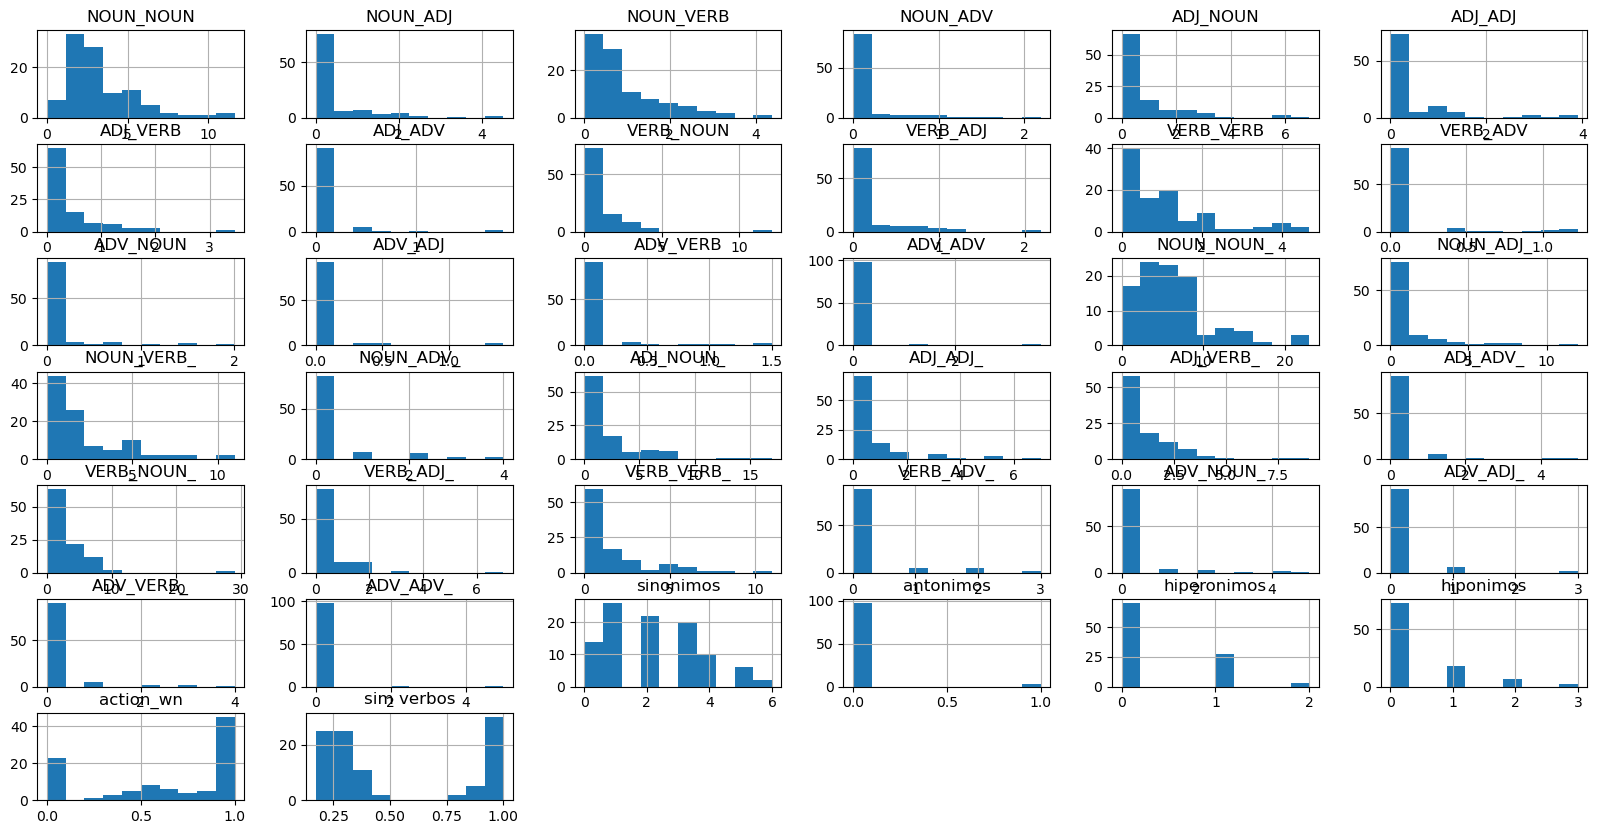

In [1944]:
dataframe.hist(figsize=(20,10))
plt.show()

In [1945]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [1946]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [1947]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_12028\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_12028\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 38)

In [1948]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1949]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1950]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [1951]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1952]:
model.decision_function(X)

array([[ 6.28411668e-01,  2.50294696e-01, -8.78706364e-01],
       [-9.65696931e-01,  5.08906900e-01,  4.56790031e-01],
       [-3.02161588e-02, -7.10675405e-01,  7.40891564e-01],
       [ 5.48217506e-01,  7.00418281e-01, -1.24863579e+00],
       [-6.57705000e-01,  1.11312250e-02,  6.46573775e-01],
       [ 1.36391124e-01, -6.85173471e-01,  5.48782347e-01],
       [-8.03612165e-01,  9.09031925e-01, -1.05419760e-01],
       [-6.59195138e-01,  1.26940038e+00, -6.10205247e-01],
       [-1.36638076e-01, -3.80341838e-01,  5.16979914e-01],
       [-5.69262783e-01,  1.11549533e+00, -5.46232548e-01],
       [-8.78666596e-01,  7.16052908e-01,  1.62613688e-01],
       [ 5.20893907e-01, -3.11827834e-01, -2.09066073e-01],
       [-2.66647480e-01,  2.23551370e-01,  4.30961098e-02],
       [ 1.95909898e-01, -2.68803577e-01,  7.28936792e-02],
       [-6.32629412e-01, -1.25777472e-01,  7.58406884e-01],
       [-6.28993752e-01,  7.66837590e-01, -1.37843839e-01],
       [-5.09132157e-01,  2.06737142e+00

In [1953]:
labels=dataframe.columns[1:]

In [1954]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [1955]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [1956]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  27 ADV_NOUN_ 32 antonimos
Entailment  32 antonimos 20 ADJ_ADJ_
Neutral  30 ADV_ADV_ 36 sim verbos


In [1957]:
n_columns=dataframe.shape[1]-1

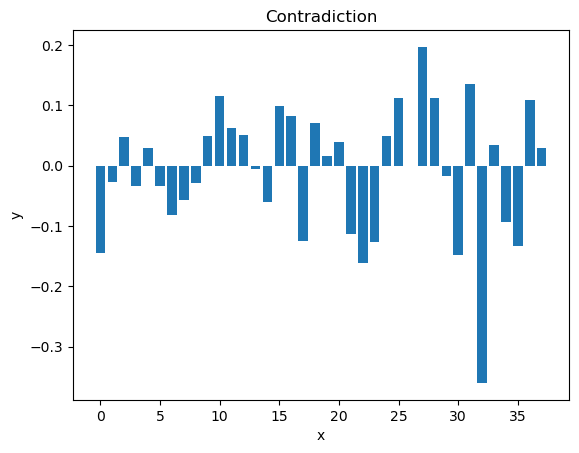

In [1958]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

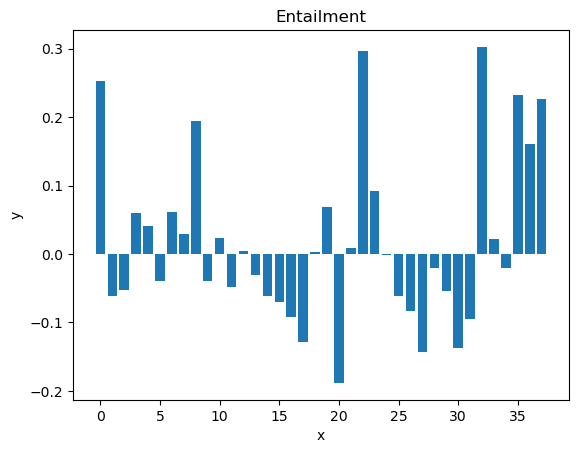

In [1959]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

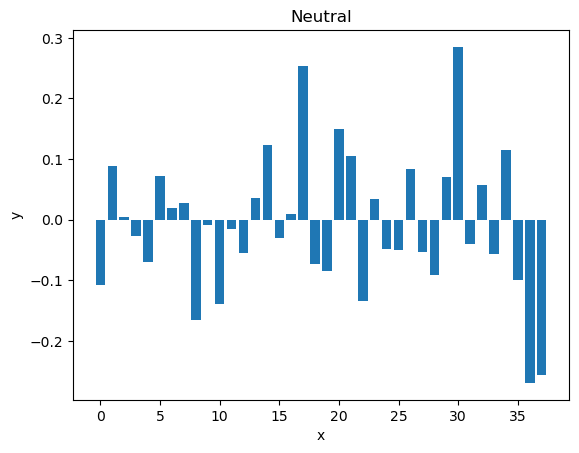

In [1960]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [1961]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'neutral'
 'contradiction' 'entailment' 'contradiction' 'contradiction' 'neutral'
 'contradiction' 'neutral' 'contradiction' 'contradiction' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'contradiction' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'entailment'
 'contradiction' 'contradiction' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'neutral' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'contradiction' 'entailment' 'contradiction' 'contradiction'
 'contradiction' 'neutral' 'entailment' 'en

In [1962]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [1963]:
X

array([[2.35856082, 0.32333437, 0.62231132, ..., 3.        , 0.8       ,
        0.23303741],
       [4.87990355, 0.94464815, 0.45253906, ..., 1.        , 1.        ,
        0.20343813],
       [2.30507833, 0.92826292, 0.94227543, ..., 0.        , 0.4       ,
        0.36080334],
       ...,
       [1.0652501 , 0.        , 0.25450289, ..., 0.        , 0.        ,
        0.24513762],
       [1.31697321, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [2.04060655, 0.        , 0.68808258, ..., 0.        , 0.66666667,
        0.23483758]])

In [1964]:
model.score(X,y)

0.69

In [1965]:
print(confusion_matrix(y, predictions))

[[14 10  3]
 [ 7 35  0]
 [ 4  7 20]]


In [1966]:
print(f1_score(y,predictions, average=None))

[0.53846154 0.74468085 0.74074074]


In [1967]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [1968]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.487500 (0.147373)


In [1969]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [1970]:
print(confusion_matrix(Y_validation, predictions))

[[3 1 0]
 [3 7 0]
 [4 0 2]]


In [1971]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.30      0.75      0.43         4
   entailment       0.88      0.70      0.78        10
      neutral       1.00      0.33      0.50         6

     accuracy                           0.60        20
    macro avg       0.72      0.59      0.57        20
 weighted avg       0.80      0.60      0.62        20



In [1972]:
#X_new = pd.DataFrame()
#model.predict(X_new)